
# Clustering Algorithms

Unsupervised learning focuses on finding patterns in data without labeled outputs. Clustering is a key unsupervised learning technique that groups similar observations together based on their features. It is exploratory in nature, meaning the results can vary significantly depending on the algorithm, distance metric used, and parameters set. Common clustering algorithms include:

-   **k-Means**: Partitions data into k clusters by minimizing the variance within each cluster.
-   **Hierarchical Clustering**: Builds a hierarchy of clusters, either agglomerative (bottom-up) or divisive (top-down).
-   **DBSCAN**: Density-Based Spatial Clustering of Applications with Noise, which finds clusters of varying shape and density.
-   **Gaussian Mixture Models (GMM)**: Assumes data is generated from a mixture of several Gaussian distributions and uses the Expectation-Maximization algorithm to estimate parameters.

## Advantages and Disadvantages

-   **Advantages**:
    -   Can discover hidden patterns and structures in data.
    -   Useful for exploratory data analysis and feature engineering.
    -   Can handle large datasets without the need for labeled data.
-   **Disadvantages**:
    -   Results can be difficult to interpret, especially in clustering.
    -   No guarantee of finding meaningful patterns; results can be sensitive to the choice of algorithm and parameters.
    -   Evaluation of clustering results can be challenging without ground truth labels.

## K-Means

k-Means is a popular clustering algorithm that partitions data into k clusters by minimizing the variance within each cluster. It works as follows:

-   Initialize $k$ centroids randomly from the data points.
-   Assign each data point to the nearest centroid based on a distance metric (commonly Euclidean distance).
-   Update the centroids by calculating the mean of all points assigned to each cluster.
-   Repeat steps 2 and 3 until convergence (i.e., centroids do not change significantly).

### Advantages and Disadvantages

-   **Advantages**:
    -   Simple and efficient for large datasets.
    -   Works well when clusters are spherical and of similar size.
-   **Disadvantages**:
    -   Requires specifying the number of clusters (k) beforehand.
    -   Sensitive to outliers and noise.
    -   Assumes clusters are spherical and equally sized, which may not hold in practice.

### Example

To illustrate the concepts of unsupervised learning, we will use the Iris dataset and apply PCA for dimensionality reduction and K-Means for clustering.

-   Load the Iris dataset

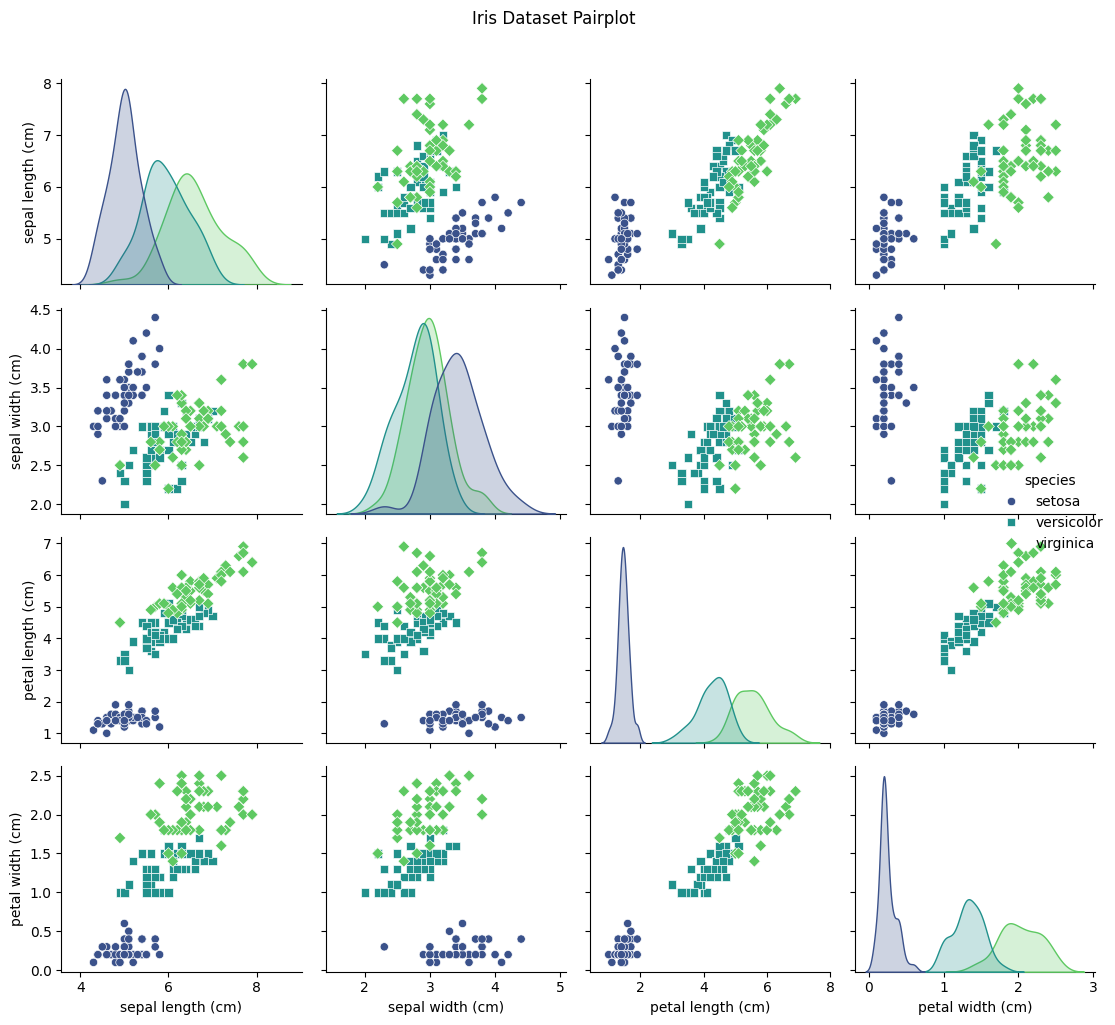

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
df = pd.read_csv('../../data/iris.csv', header=0)
X = df.drop('species', axis=1)
y = df['species'].astype('category').cat.codes

sns.pairplot(df, hue='species', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.xlabel('Features')
plt.ylabel('Features')
# plt.legend(title='Species', loc='upper right')
plt.tight_layout()
plt.show()

-   Preprocess the data

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
# Standardize the data
scaler = Normalizer()
X = scaler.fit_transform(X)

-   Apply PCA for dimensionality reduction to 2 dimensions and visualize the results

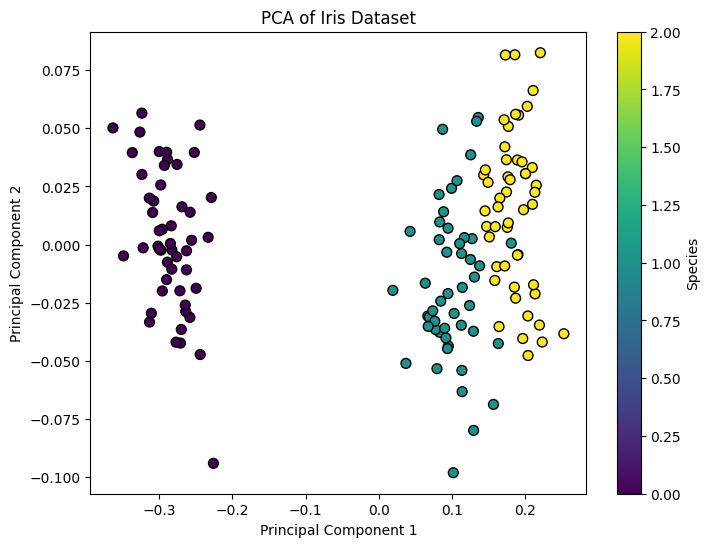

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Species')
plt.show()

-   Apply K-Means clustering on the PCA-reduced data and visualize the clusters

/tmp/ipykernel_1304995/1003231196.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


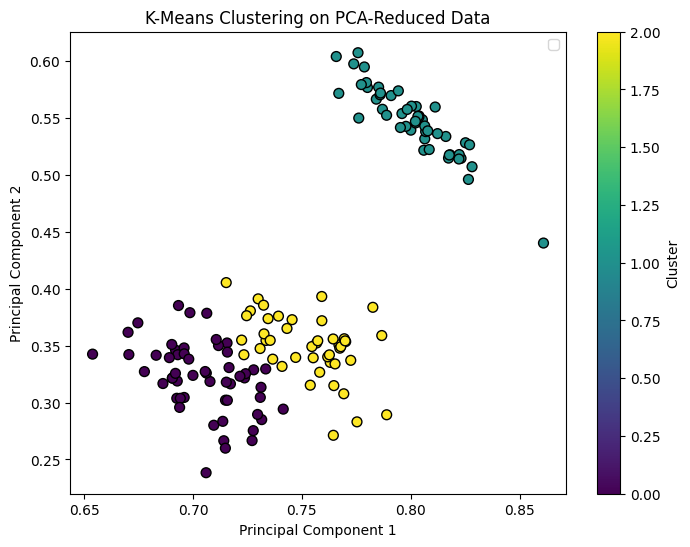

In [4]:
from sklearn.cluster import KMeans
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Plot the K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

-   Evaluate the clustering results

In [5]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, y_kmeans)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calculate the adjusted Rand Index (ARI) to compare with true labels
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, y_kmeans)
print(f'Adjusted Rand Index: {ari:.2f}')

Silhouette Score: 0.61
Adjusted Rand Index: 0.90


## Hierarchical Clustering

Hierarchical clustering builds a hierarchy of clusters, either agglomerative (bottom-up) or divisive (top-down). It does not require specifying the number of clusters in advance. The algorithm works as follows:

-   Start with each data point as its own cluster.
-   Merge the two closest clusters based on a distance metric (e.g., single-linkage, complete-linkage, average-linkage).
-   Repeat step 2 until all points are in a single cluster or a stopping criterion is met (e.g., a desired number of clusters).

### Advantages and Disadvantages

-   **Advantages**:
    -   No need to predefine the number of clusters.
    -   Produces a dendrogram that visualizes the hierarchy of clusters.
-   **Disadvantages**:
    -   Computationally expensive for large datasets.
    -   Sensitive to noise and outliers.

### Example

To illustrate hierarchical clustering, we will use the Iris dataset and visualize the dendrogram.

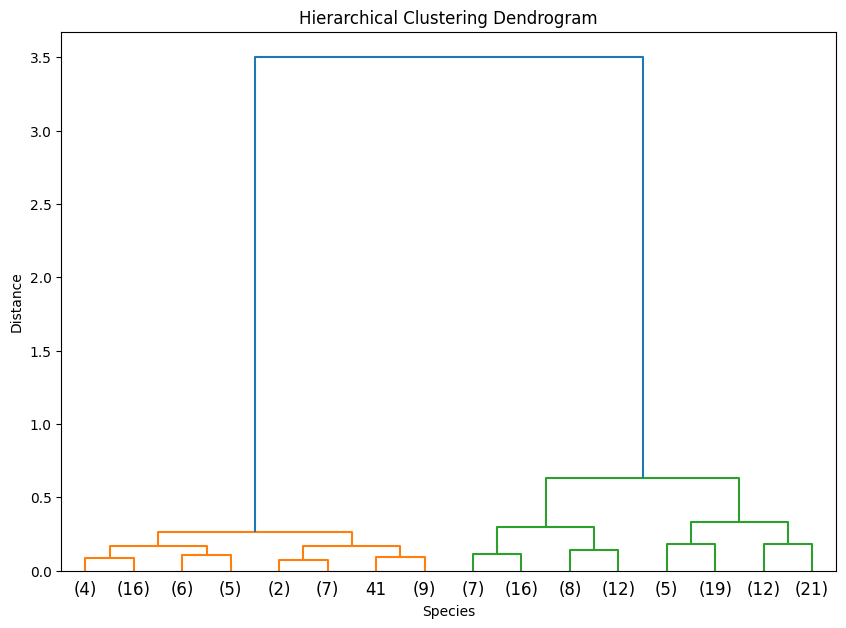

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Perform hierarchical clustering
cls = AgglomerativeClustering(linkage='ward', compute_distances=True, n_clusters=3)
cls = cls.fit(X_pca)

def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = \
    np.column_stack([model.children_, model.distances_, counts]).astype(float)

  # Plot the corresponding dendrogram
  dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(cls, truncate_mode="level", p=3)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.show()  

-   Evaluate the clustering results using silhouette score and adjusted Rand index

In [7]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, cls.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

# Calculate the adjusted Rand Index (ARI) to compare with true labels
ari = adjusted_rand_score(y, cls.labels_)
print(f'Adjusted Rand Index: {ari:.2f}')

Silhouette Score: 0.56
Adjusted Rand Index: 0.80


-   Visualize the clusters formed by hierarchical clustering

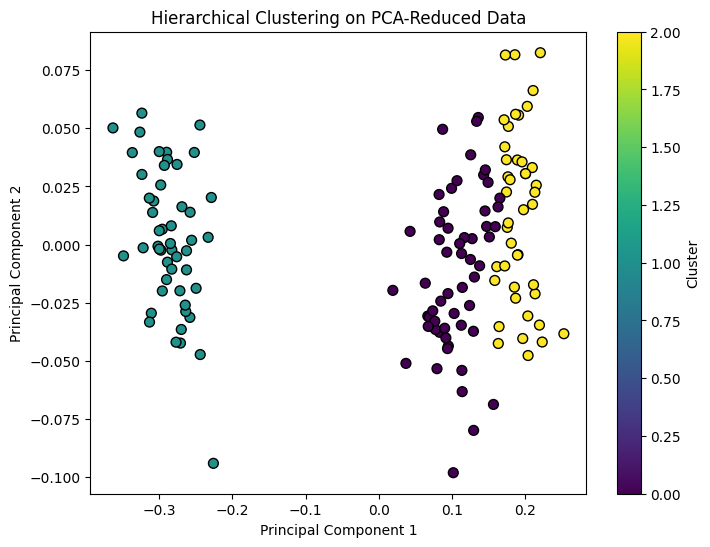

In [8]:
# Plot the clusters formed by hierarchical clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cls.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Hierarchical Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Hands-on Exercises

Use K-Means and Hierarchical Clustering on the Breast Cancer Wisconsin dataset

-   Load the Breast Cancer Wisconsin dataset

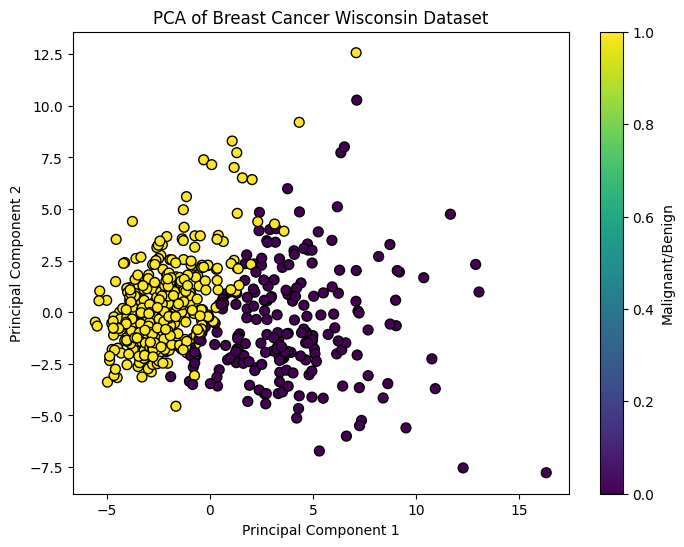

In [9]:
from sklearn.datasets import load_breast_cancer
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X_bc = data.data
y_bc = data.target

# Standardize the data
scaler_bc = StandardScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

# Apply PCA to reduce to 2 dimensions
pca_bc = PCA(n_components=2, random_state=42)
X_bc_pca = pca_bc.fit_transform(X_bc_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=y_bc, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Breast Cancer Wisconsin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Malignant/Benign')
plt.show()

-   Apply K-Means clustering on the PCA-reduced data and visualize the clusters

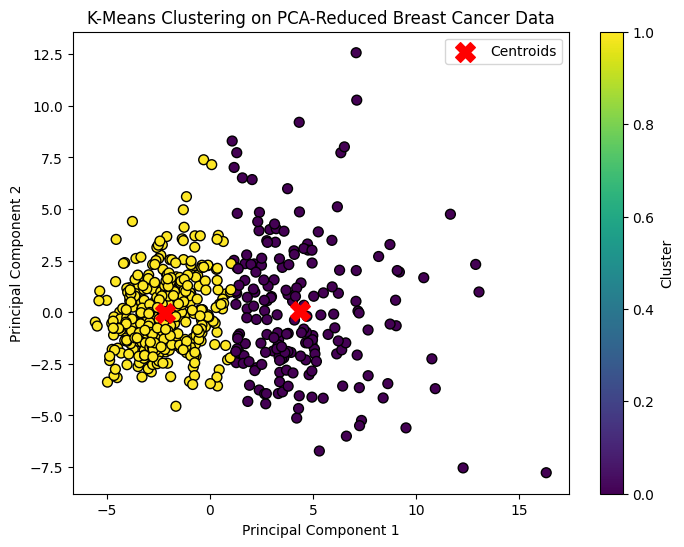

In [10]:
# Apply K-Means clustering
kmeans_bc = KMeans(n_clusters=2, random_state=42)
kmeans_bc.fit(X_bc_pca)
y_kmeans_bc = kmeans_bc.predict(X_bc_pca)

# Plot the K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=y_kmeans_bc, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_bc.cluster_centers_[:, 0], kmeans_bc.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

-   Evaluate the clustering results using silhouette score and adjusted Rand index

In [11]:
# Calculate the silhouette score
silhouette_avg_bc = silhouette_score(X_bc_pca, y_kmeans_bc)
print(f'Silhouette Score: {silhouette_avg_bc:.2f}')

# Calculate the adjusted Rand Index (ARI) to compare with true labels
ari_bc = adjusted_rand_score(y_bc, y_kmeans_bc)
print(f'Adjusted Rand Index: {ari_bc:.2f}')

Silhouette Score: 0.51
Adjusted Rand Index: 0.66


-   Visualize the clusters formed by K-Means clustering and compare with true labels

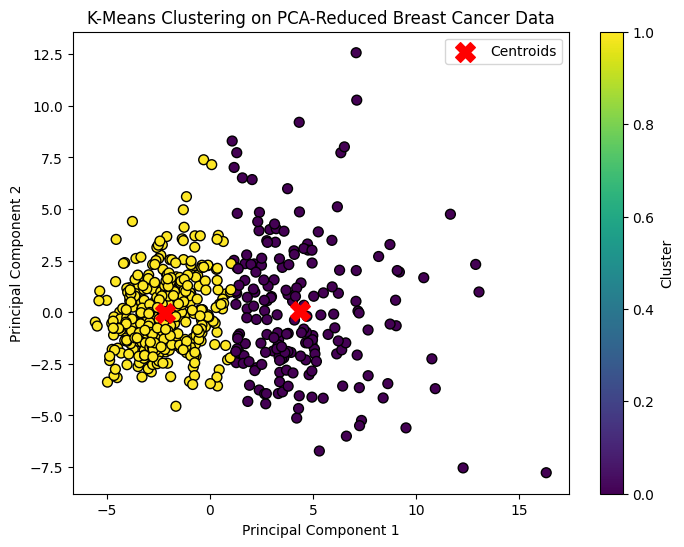

In [12]:
# Plot the clusters formed by K-Means clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=y_kmeans_bc, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_bc.cluster_centers_[:, 0], kmeans_bc.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

-   Apply Hierarchical Clustering on the PCA-reduced data and visualize the clusters

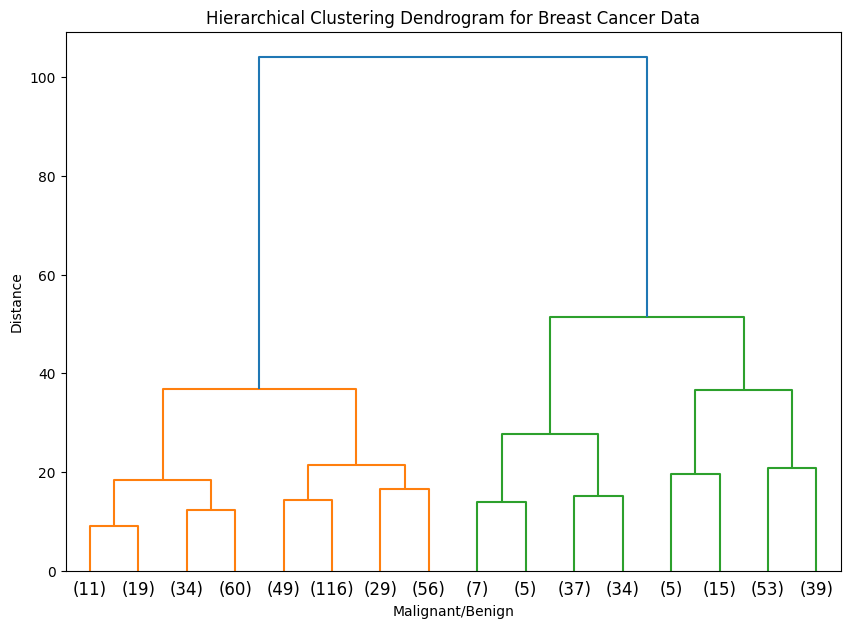

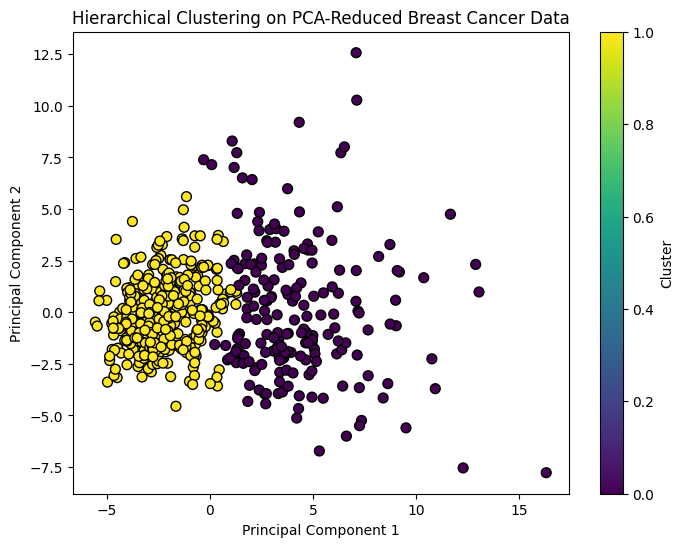

In [13]:
# Perform hierarchical clustering
cls_bc = AgglomerativeClustering(linkage='ward', compute_distances=True, n_clusters=2)
cls_bc = cls_bc.fit(X_bc_pca)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plot_dendrogram(cls_bc, truncate_mode="level", p=3)
plt.title('Hierarchical Clustering Dendrogram for Breast Cancer Data')
plt.xlabel('Malignant/Benign')
plt.ylabel('Distance')
plt.show()

# Plot the clusters formed by hierarchical clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=cls_bc.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Hierarchical Clustering on PCA-Reduced Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

-   Evaluate the clustering results using silhouette score and adjusted Rand index

In [14]:
# Calculate the silhouette score
silhouette_avg_bc_hc = silhouette_score(X_bc_pca, cls_bc.labels_)
print(f'Silhouette Score: {silhouette_avg_bc_hc:.2f}')

# Calculate the adjusted Rand Index (ARI) to compare with true labels
ari_bc_hc = adjusted_rand_score(y_bc, cls_bc.labels_)
print(f'Adjusted Rand Index: {ari_bc_hc:.2f}')

Silhouette Score: 0.50
Adjusted Rand Index: 0.66


-   Compare the clustering results of K-Means and Hierarchical Clustering

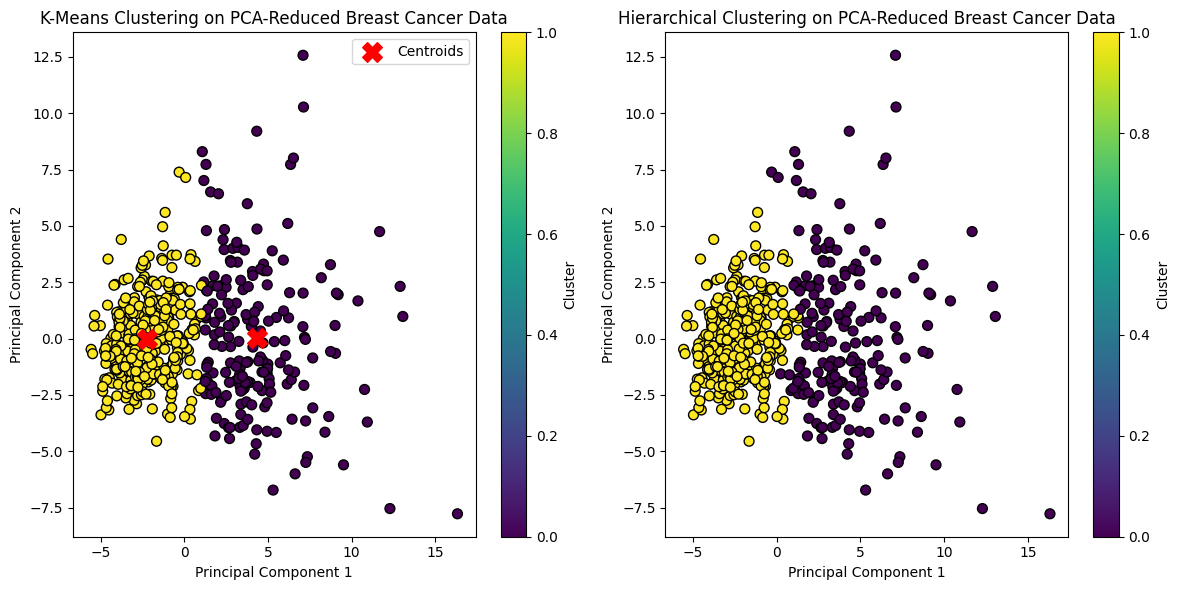

In [15]:
# Compare the clustering results
plt.figure(figsize=(12, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=y_kmeans_bc, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans_bc.cluster_centers_[:, 0], kmeans_bc.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()

# Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(X_bc_pca[:, 0], X_bc_pca[:, 1], c=cls_bc.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('Hierarchical Clustering on PCA-Reduced Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()